In [1]:
import pandas as pd
from kmeans import KMeansClusterClassifier
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
import plotly_express as px
from sklearn.metrics import classification_report, accuracy_score , confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score , auc
from random import randint
from sklearn.tree import DecisionTreeClassifier
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("Iris.csv") 
X_data = data[['SepalLengthCm', 'SepalWidthCm' , 'PetalLengthCm' , 'PetalWidthCm']]
y = data['Species']

abc = randint(1,100)
X_train, X_test, y_train, y_test = train_test_split(X_data, y, train_size=0.80, random_state=abc)
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [3]:
distortions = []
K = range(1,10)

for k in K:
    toplam = 0
    for i in range(3):
        clf = KMeansClusterClassifier(k)
        X_son,y_son = clf.fit(X_train,y_train)
        toplam += (sum(np.min(cdist(X_train, X_son, 'euclidean'), axis=1)) / X_train.shape[0])
    distortions.append(toplam/3)


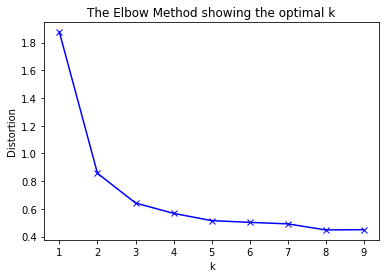

In [4]:
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [5]:
xd = KMeansClusterClassifier(3)
while 1:
    X_son,y_son = xd.fit(X_train,y_train)
    if ('Iris-setosa' in y_son )and ('Iris-versicolor' in y_son) and ('Iris-virginica' in y_son):
        break
predictions = xd.predict(X_test,X_son,y_son)

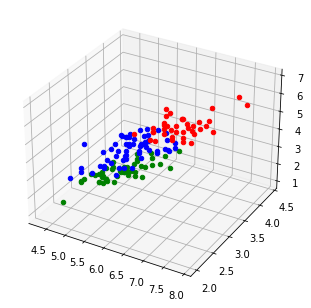

In [6]:
X_data = X_data.values
def distance(point1, point2):
    dist = (((point1[0] - point2[0])**2)+((point1[1] - point2[1])**2)+((point1[2] - point2[2])**2)+((point1[3] - point2[3])**2))**0.5
    return dist

which_centoid = [[0] for c in range(X_data.shape[0])]
dist_2_centroids = [0] * 3
for i in range(X_data.shape[0]):
    point = X_data[i]
    for j in range(3):
        center = X_son[j]
        dist_2_centroids[j] = distance(point,center)
    minimum_dist = min(dist_2_centroids)
    minimum_distance_class = dist_2_centroids.index(min(dist_2_centroids))
    which_centoid[i] = minimum_distance_class

fig=plt.figure()
ax=Axes3D(fig)

for i in range(X_data.shape[0]):
    if which_centoid[i] == 0:
        ax.scatter(X_data[i][0],X_data[i][1],X_data[i][2],color='red')
    if which_centoid[i] == 1:
        ax.scatter(X_data[i][0],X_data[i][1],X_data[i][2],color='green')
    if which_centoid[i] == 2:
        ax.scatter(X_data[i][0],X_data[i][1],X_data[i][2],color='blue')
plt.show()

In [7]:
print(confusion_matrix(y_test,predictions))

[[12  0  0]
 [ 0  7  1]
 [ 0  2  8]]


In [8]:
print(classification_report(y_test,predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.78      0.88      0.82         8
 Iris-virginica       0.89      0.80      0.84        10

       accuracy                           0.90        30
      macro avg       0.89      0.89      0.89        30
   weighted avg       0.90      0.90      0.90        30



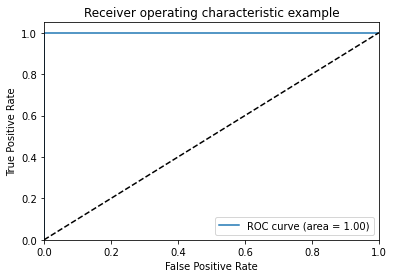

AUC
1.0


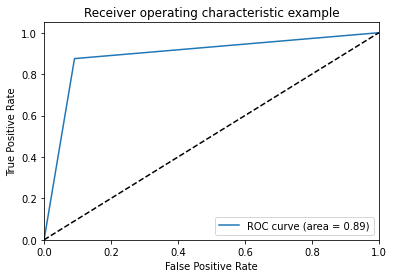

AUC
0.8920454545454546


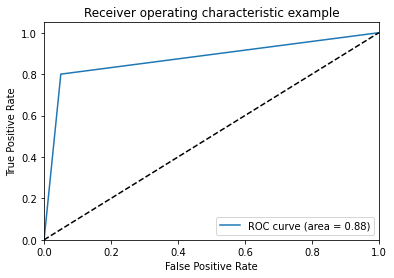

AUC
0.875


In [9]:
from sklearn.preprocessing import label_binarize
test = [[0] for i in range(len(y_test))]
for i in range(len(y_test)):
    if y_test[i] == 'Iris-setosa':
        test[i] = 0
    if y_test[i] == 'Iris-versicolor':
        test[i] = 1
    if y_test[i] == 'Iris-virginica':
        test[i] = 2
    if predictions[i] == 'Iris-setosa':
        predictions[i] = 0
    if predictions[i] == 'Iris-versicolor':
        predictions[i] = 1
    if predictions[i] == 'Iris-virginica':
        predictions[i] = 2


y = label_binarize(test, classes=[0,1,2])
pr = label_binarize(predictions, classes=[0,1,2])

n_classes = 3
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y[:, i], pr[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()
    print('AUC')
    print(roc_auc[i])

In [10]:
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.88      0.88      0.88         8
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.92      0.92      0.92        30
   weighted avg       0.93      0.93      0.93        30



Decision Tree Algorithm gives us better results. If we compare the Accuracy values, we see that we get better results. The random points selected in the K Means Clustering algorithm affect the result of the algorithm a lot. That's why we get inconsistent results. Therefore, the Decision Tree Algorithm is a more useful algorithm. The worst disadvantage of using K means clustering is to classify all data over random center points. If the center points come at the extreme points, the result will be very bad.